Необходимо, используя тест Гренджера на причинность, определить, является ли процесс, описываемый датасетом А причиной процесса Б (по Гренджеру), и наоборот.

In [49]:
#pip install seaborn

In [50]:
#pip install statsmodels

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [52]:
vaccinations = pd.read_csv("vaccinations.csv")
vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0


In [53]:
all_tweets = pd.read_csv("vaccination_all_tweets.csv")
all_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [54]:
# приводим данные по датам к одинаковому виду для датасета с твитами
all_tweets['date'].str.split(' ').apply(lambda x: x[0])#разделяем значения в колонке на подстроки и берём первый элемент

0         2020-12-20
1         2020-12-13
2         2020-12-12
3         2020-12-12
4         2020-12-12
             ...    
228202    2021-11-15
228203    2021-11-15
228204    2021-11-15
228205    2021-11-15
228206    2021-11-15
Name: date, Length: 228207, dtype: object

In [55]:
# создаём новый DataFrame
count_tweet = pd.DataFrame(all_tweets['date'].str.split(' ').apply(lambda x: x[0]))

In [56]:
# данные по количеству вакцинаций в день, группируем:
count_vac = vaccinations.groupby(['date'], as_index = False).agg({'daily_vaccinations': 'sum'})
count_vac

,date,daily_vaccinations
0,2020-12-02,0.0
1,2020-12-03,0.0
2,2020-12-04,0.0
3,2020-12-05,0.0
4,2020-12-06,0.0
...,...,...
265,2021-08-24,141618411.0
266,2021-08-25,144342936.0
267,2021-08-26,147456968.0
268,2021-08-27,148928388.0


In [57]:
# аналогично с данными по количеству твитов в день, группируем:
count_tweet = tweet_count.groupby('date', as_index = False).agg(tweets = ('date', 'count'))
count_tweet

,date,tweets
0,2020-12-12,63
1,2020-12-13,98
2,2020-12-14,137
3,2020-12-15,150
4,2020-12-16,144
...,...,...
314,2021-11-19,846
315,2021-11-20,765
316,2021-11-21,629
317,2021-11-22,612


In [58]:
# группируем данные с вакцинациями и твитами в один датасет
data_merged = pd.merge(left = count_vac, right = count_tweet, on = 'date', how = 'inner')
data_merged.head()

,date,daily_vaccinations,tweets
0,2020-12-12,15297.0,63
1,2020-12-13,50750.0,98
2,2020-12-14,139627.0,137
3,2020-12-15,371204.0,150
4,2020-12-16,580596.0,144


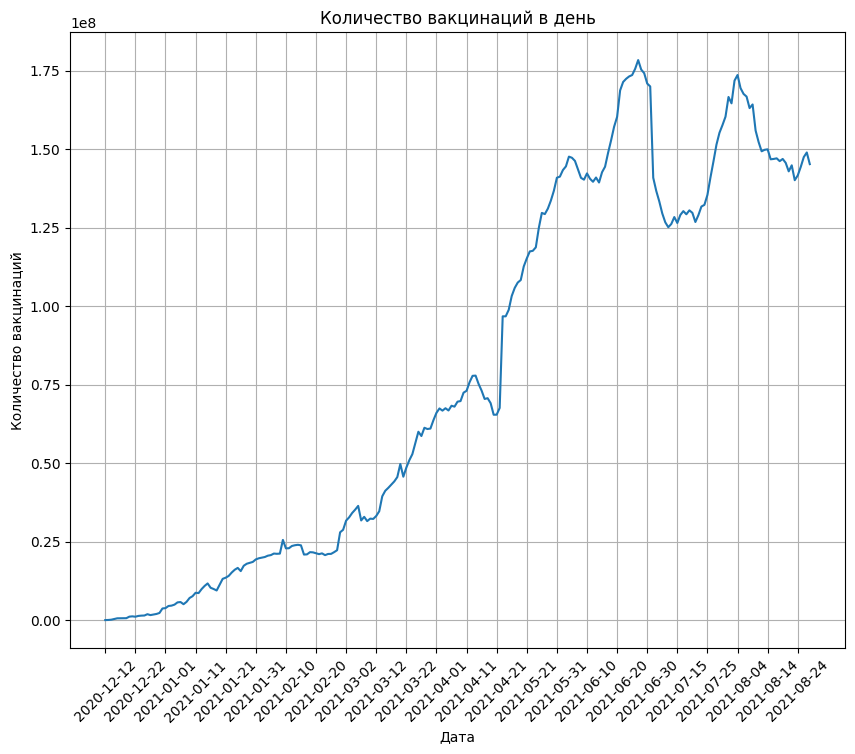

In [59]:
# график количества вакцинаций в день
plt.figure(figsize = (10,8))
plt.plot(data_merged['date'], data_merged['daily_vaccinations'])
plt.title('Количество вакцинаций в день')
plt.grid()
plt.ylabel('Количество вакцинаций')
plt.xlabel('Дата')
plt.xticks(data_merged['date'][range(0,len(data_merged),10)], rotation = 45);

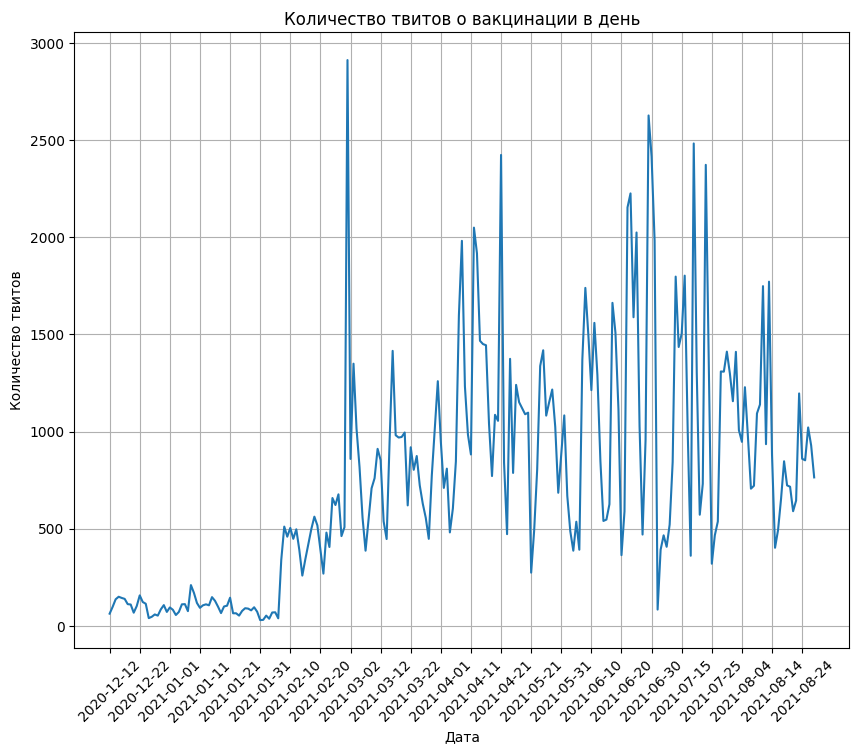

In [60]:
# график количества твитов в день
plt.figure(figsize = (10,8))
plt.plot(data_merged['date'], data_merged['tweets'])
plt.title('Количество твитов о вакцинации в день')
plt.grid()
plt.ylabel('Количество твитов')
plt.xlabel('Дата')
plt.xticks(data_merged['date'][range(0,len(data_merged),10)], rotation = 45);

In [61]:
# используем функцию для проведения тестов Грейнджера
# проверяем, зависит ли количество вакцинаций от количества твитов
# то есть определим, существует ли статистически значимая связь между ними
grangercausalitytests(data_merged[['daily_vaccinations', 'tweets']], maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.4731  , p=0.1997  , df_denom=219, df_num=5
ssr based chi2 test:   chi2=7.7353  , p=0.1714  , df=5
likelihood ratio test: chi2=7.6081  , p=0.1792  , df=5
parameter F test:         F=1.4731  , p=0.1997  , df_denom=219, df_num=5


{5: ({'ssr_ftest': (1.4730690927591017, 0.19970795126488827, 219.0, 5),
   'ssr_chi2test': (7.735294322707611, 0.17144012578355072, 5),
   'lrtest': (7.608063523120109, 0.179199960526471, 5),
   'params_ftest': (1.473069092759067, 0.19970795126490015, 219.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

Из полученного результата видно, что P-value больше 0.05, а значит не можем откинуть нулевую гипотезу об отсутствии зависимости количества вакцинаций от твитов. Таким образом, число твитов не определяет изменение числа вакцинаций

In [62]:
# используем функцию для проведения тестов Грейнджера
# проверяем, зависит ли количество твитов от количества вакцинаций
# то есть определим, существует ли статистически значимая связь между ними
grangercausalitytests(data_merged[['tweets', 'daily_vaccinations']], maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.9248  , p=0.0141  , df_denom=219, df_num=5
ssr based chi2 test:   chi2=15.3584 , p=0.0089  , df=5
likelihood ratio test: chi2=14.8673 , p=0.0109  , df=5
parameter F test:         F=2.9248  , p=0.0141  , df_denom=219, df_num=5


{5: ({'ssr_ftest': (2.924765765818872, 0.014082857708674512, 219.0, 5),
   'ssr_chi2test': (15.358359044254351, 0.00893600311136999, 5),
   'lrtest': (14.867320269087031, 0.010944559637026636, 5),
   'params_ftest': (2.9247657657733286, 0.014082857709910352, 219.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

P-value меньше 0.05, а значит откидываем нулевую гипотезу об отсутствии зависимости количества твитов от вакцинаций. То есть, существует зависимость и изменение числа вакцинаций определяет изменение числа твитов

In [63]:
0

0